<a href="https://colab.research.google.com/github/solielmaf/pytorch/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn # nn conatins all of pytorch's building blocks for neural network
import matplotlib.pyplot as plt


 ## 1. Data(preparing and loading)


  data can be almost anything in machine learning

* Excel speadsheet
* Images
* videos
* Audio
* DNA
* Text

machine learning has two parts:

1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation

We'll use linear regression formula to make a straight line with known parameters

In [2]:
# create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step= 0.02
X = torch.arange(start,end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Spliting data into training and test sets

Create training and test set of data


In [3]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split],Y[:train_split]
X_test ,Y_test = X[train_split:],Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

Visualize

In [4]:
def plot_predicitons( train_data= X_train,
                     train_labels=Y_train,
                      test_data= X_test,
                      test_labels = Y_test,
                      predictions= None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b", s=4, label="Trainig data")
  plt.scatter(test_data, test_labels, c="g", s=4 , label="Testing data")

  if predictions is not None:
    plt.scatter(test_data,predictions , c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14})




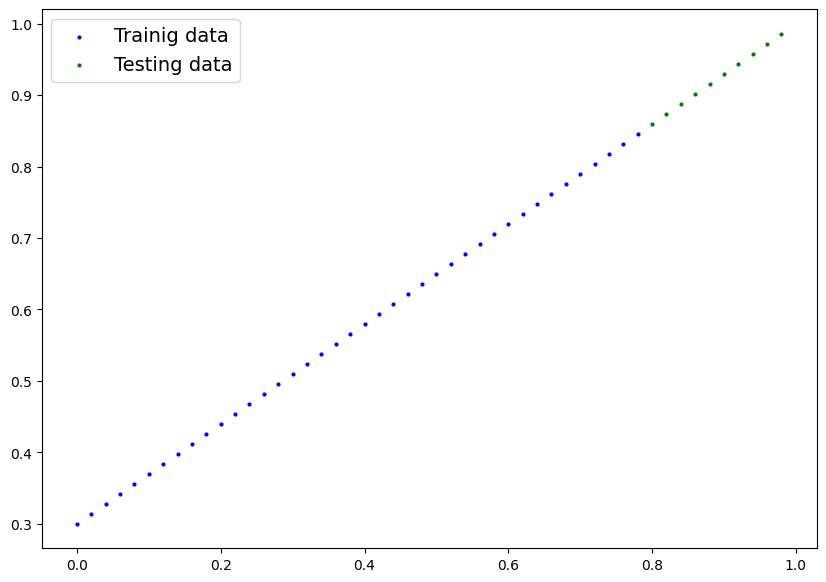

In [5]:
plot_predicitons()

##Create Model
start with random data and adjust to become closer to the actual

2 method
1. gradient descent
2. backpropagation

In [6]:
# create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  #forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


## model building essentials

- torch.nn - conatin all buidings for computational graphs (neural network)

- torch.nn.Parameter - what parameter should our model try to Learn

- torch.nn.Module - base class for all modules, if there is subclass overwrite forward
- torch.optim - where optimizer live and help the gradient descent
- def forward() -all nn.Module subclasses need overwrite forward


check our model parameter .Parameter

In [7]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())


[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

## Making prediction using torch.inference_model()

In [9]:
with torch.inference_mode():
  y_pred = model_0(X_test)


y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

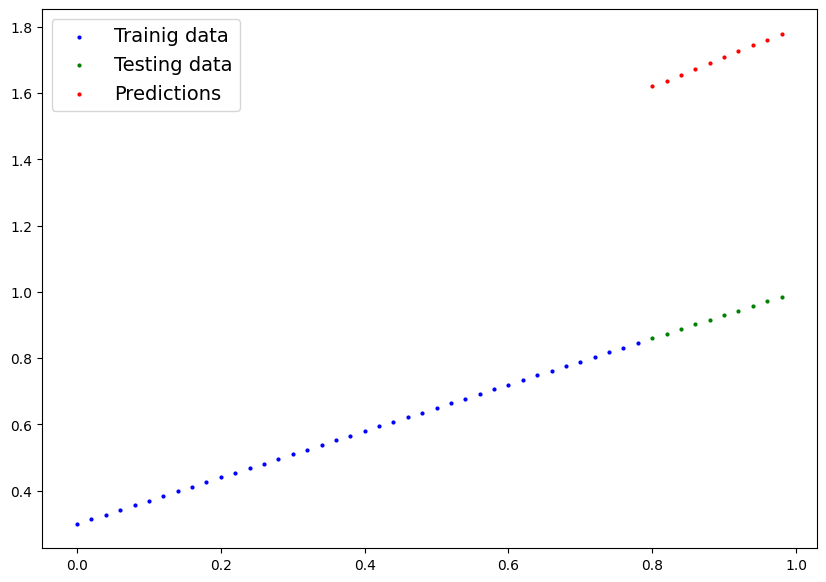

In [10]:
plot_predicitons(predictions=y_pred)

## loss function//cost ( how wrong the prediction is)

- loss function
- optimizer -adjust model parameter

we need
- training loop
- testing loop

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [12]:
# setup a loss function
loss_fn = nn.L1Loss()

#setup a loss function
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) # lr learning right the smaller the value the smaller the change ,hyperparameter that we set

### Building training loop (and testing loop)

A we need

0. loop thorugh the data
1. Forward pass  - data moving through our model's forward() functions (forward propagation)
2. Calculate the loss ( compare forward pass prediction to the truth)
3. Optimizer zero grad
4. Loss backward- backpropagation
5. Optimizer step - gradient descent


In [13]:
# an epoch is one loop throu the data
epochs = 100
epoch_count = []
loss_values = []
test_loss_values = []

# loop through the data
for epoch in range(epochs):
  model_0.train() # train mode sets all parameter that require gradient to require gradient
  # 1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, Y_train)
  print(f"Loss: {loss}")

  #3. optimizer zero
  optimizer.zero_grad()

  #4 Loss backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()
  model_0.eval() # turns off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, Y_test)
  if epochs % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Test loss: {test_loss}")

    print( model_0.state_dict())

Loss: 0.6860889196395874
Test loss: 0.7637526988983154
OrderedDict({'weights': tensor([0.8784]), 'bias': tensor([0.9050])})
Loss: 0.6745679974555969
Test loss: 0.7502816915512085
OrderedDict({'weights': tensor([0.8745]), 'bias': tensor([0.8950])})
Loss: 0.6630470156669617
Test loss: 0.7368106245994568
OrderedDict({'weights': tensor([0.8706]), 'bias': tensor([0.8850])})
Loss: 0.6515260338783264
Test loss: 0.7233396768569946
OrderedDict({'weights': tensor([0.8667]), 'bias': tensor([0.8750])})
Loss: 0.6400049924850464
Test loss: 0.7098686695098877
OrderedDict({'weights': tensor([0.8628]), 'bias': tensor([0.8650])})
Loss: 0.6284840703010559
Test loss: 0.6963977217674255
OrderedDict({'weights': tensor([0.8589]), 'bias': tensor([0.8550])})
Loss: 0.6169630289077759
Test loss: 0.6829267144203186
OrderedDict({'weights': tensor([0.8550]), 'bias': tensor([0.8450])})
Loss: 0.6054420471191406
Test loss: 0.6694557666778564
OrderedDict({'weights': tensor([0.8511]), 'bias': tensor([0.8350])})
Loss: 0.

In [14]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)
  print(y_preds_new)

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])


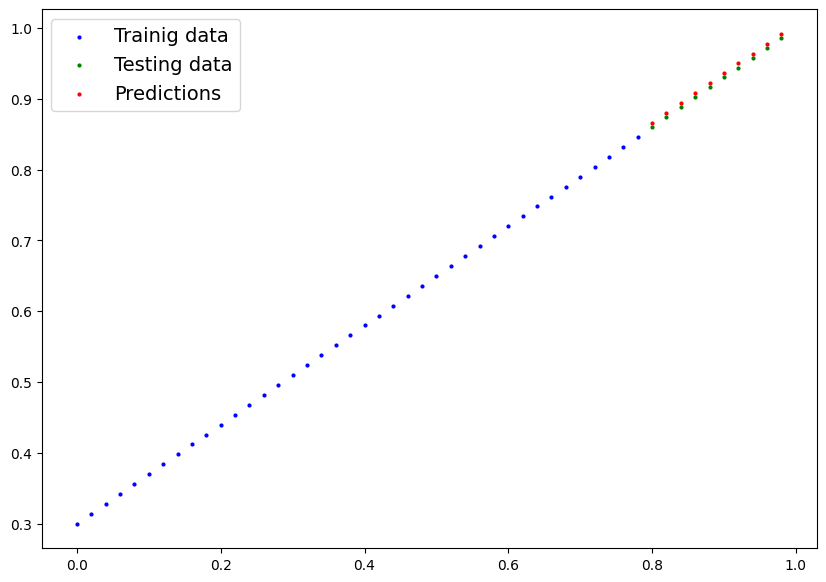

In [15]:
plot_predicitons(predictions=y_preds_new)

/tmp/ipython-input-746867348.py:2: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")


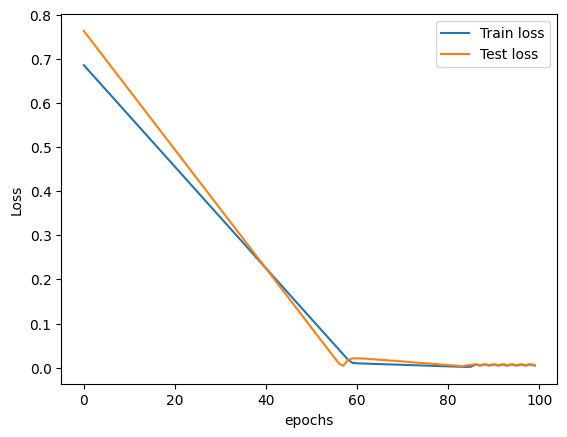

In [16]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()


### Saving a model in Pytorch
3 Main method
1. troch.save()
2. torch.load()
3. torch.nn.module.load_state_dict()


In [17]:
#saving our pytorch model
from pathlib import Path

#1. create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME = "pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)



Saving model to: models/pytorch_workflow.pth


### loading model

In [18]:
# to load in saved state_dict we have to instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [19]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [20]:
## prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [21]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [22]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### whole together

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt


## Data

None
None


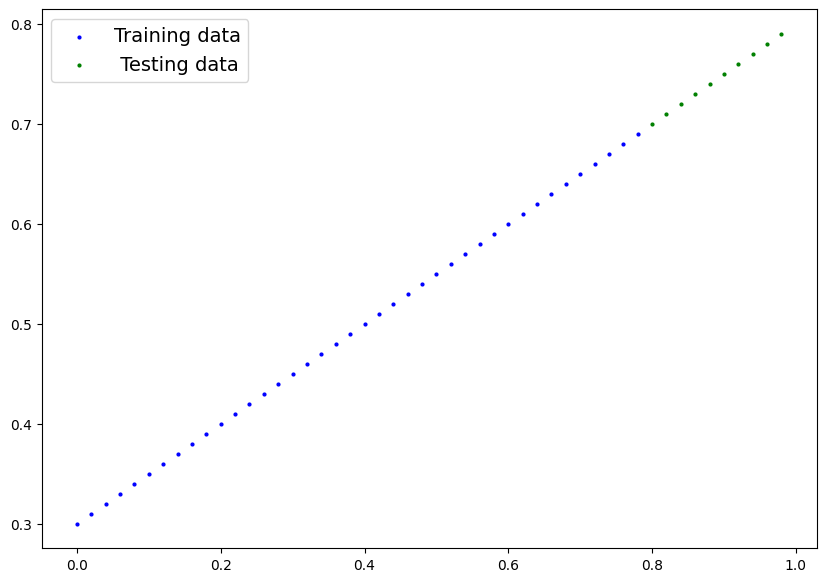

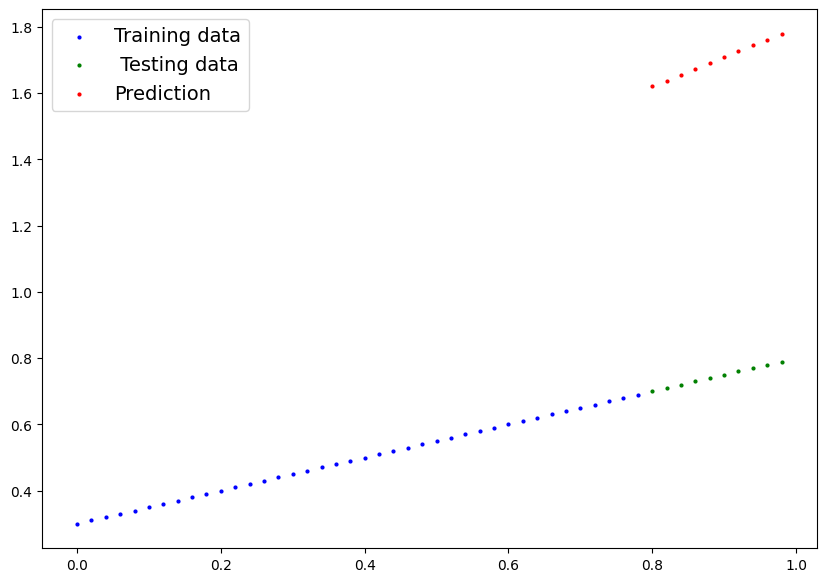

In [28]:
# create known parameters
weight = 0.5
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
Y = weight *X + bias

# create a train and test split

train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], Y[:train_split]
x_test, y_test = X[train_split:], Y[train_split:]

#plot prediction
def plot_predicitons (train_data= x_train,
                      train_labels= y_train,
                      test_data = x_test,
                      test_labels= y_test,
                      prediction = None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label=" Testing data" )

  if prediction is not None:
    plt.scatter(test_data,prediction, c="r", s=4, label= "Prediction")
  plt.legend(prop={"size": 14})

print(plot_predicitons())

# create linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

torch.manual_seed(42)
model_1 = LinearRegressionModel()

with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds
print(plot_predicitons(prediction=y_preds))

Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test loss: 0.007623642683029175
Test loss: 0.005847334861755371
Test los

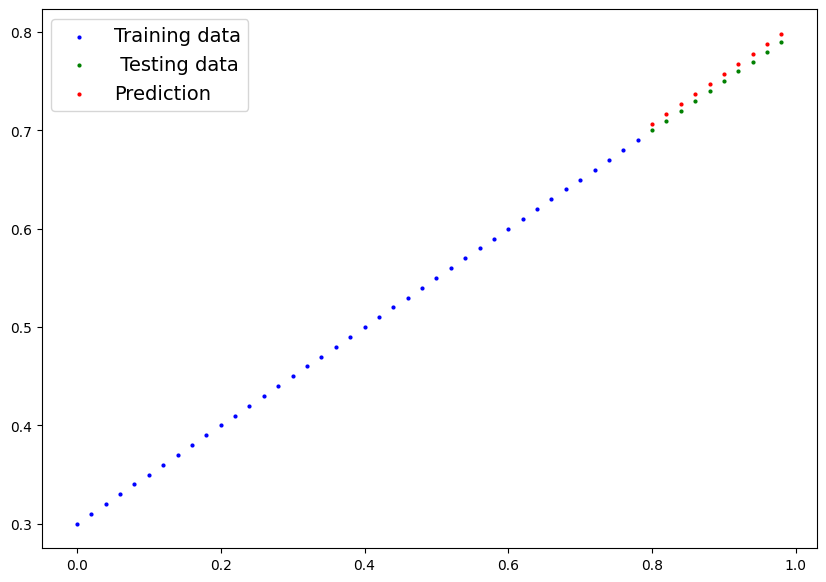

In [33]:


# set loss function
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# training loop

ephocs =200
epoch_count =[]
loss_values = []
test_loss_values =[]

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(x_train)
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss = loss_fn(test_pred, y_test)
  if epochs % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Test loss: {test_loss}")

print(model_1.state_dict())

print(plot_predicitons(prediction=test_pred))
